# Problem 1

Occasionally you will need more control over the cross-validation process than what `cross_val_score()` and similar functions provide.<br> 
Implement your own cross-validation function.

Hint: see [`sklearn.model_selection.StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and [`sklearn.base.clone`](https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html)

### Example

```python

>>> cross_val(sgd_clf, X_train, y_train_5, n_splits=3, random_state=42)
[0.9878006099695015, 0.981, 0.983849192459623]

```

### Solution:

In [6]:
def cross_val(clf, X, y, n_splits=3, metric = "accuracy", **kargs):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    if metric == "acurracy":
        from sklearn.metrics import acurracy_score
    elif metric == "recall":
        from sklearn.metrics import recall_score
    else:
        from sklearn.metrics import precision_score

    skf = StratifiedKFold(n_splits=n_splits, **kargs)
    lt = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        aux_clf = clone(clf)
        aux_clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        if metric == "acurracy":
            lt.append(accuracy_score(y_test,y_pred))
        elif metric == "recall":
            lt.append(recall_score(y_test,y_pred))
        else:
            lt.append(precision_score(y_test,y_pred))
            
    return lt

In [4]:
import numpy as np
import warnings
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_mldata

warnings.filterwarnings('ignore')

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

sgd_clf = SGDClassifier(random_state=42, max_iter=100)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
cross_val(sgd_clf, X_train, y_train_0, n_splits=3,metric="precision", random_state=42)

[0.9125890736342043, 0.915439429928741, 0.9239961759082218]

In [3]:
cross_val(sgd_clf, X_train, y_train_0, n_splits=3, random_state=42)

[0.9829008549572521, 0.98905, 0.9902495124756238]

# Problem 2
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Metric
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy".

remember: Accuracy $= \frac{TP + TN}{TP + TN + FP + FN}$

In [9]:
import pandas as pd 

train = pd.read_csv('https://raw.githubusercontent.com/shpotes/ML-biocomp/master/notebooks/lectures/data/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/shpotes/ML-biocomp/master/notebooks/lectures/data/titanic/test.csv')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
X_train = train.drop(["Survived","Name"], axis=1)
y_train = train.Survived

In [13]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


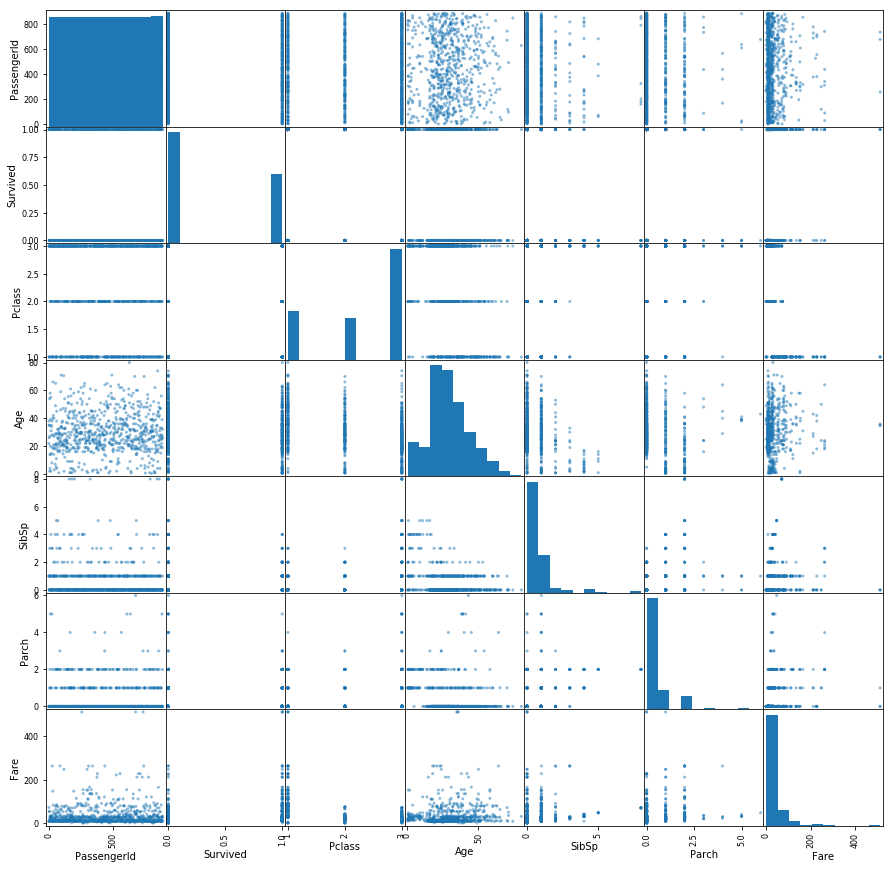

In [18]:
%matplotlib inline
pd.plotting.scatter_matrix(train, figsize=(15,15));